In [1]:
import numpy

In [1]:
import pylab

In [4]:
from shapely.geometry import LineString
from shapely.geometry import Point
import matplotlib.pyplot as plt


The expiration time has passed. Generating a new token...
Generating new token...
Requesting activity data from Strava...
1704096000.0
run title: Afternoon Rundistance: 13.499799999999999km	LAPS OF CHIP: 2


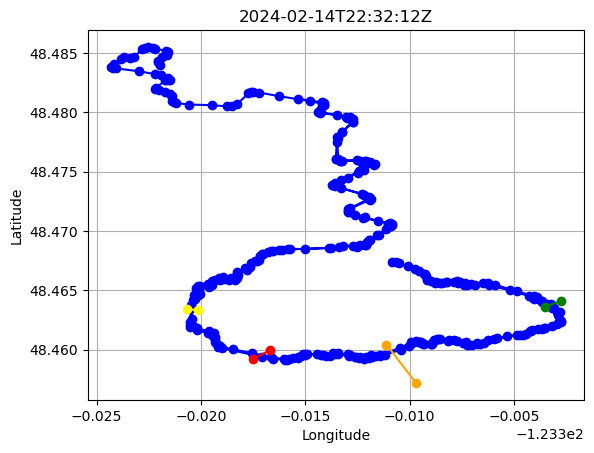

run title: Afternoon Rundistance: 9.018600000000001km	LAPS OF CHIP: 1


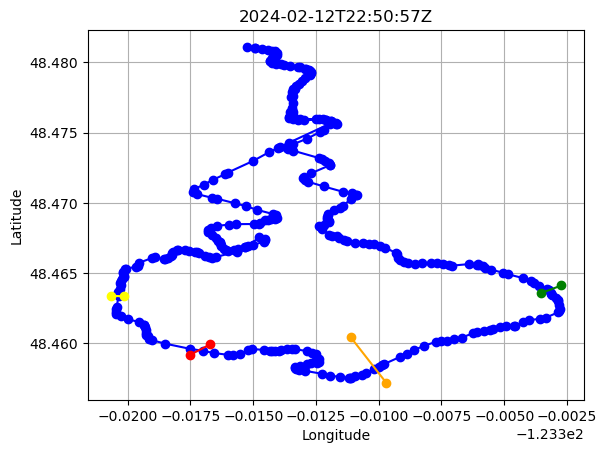

run title: Afternoon Rundistance: 6.6642km	LAPS OF CHIP: 1


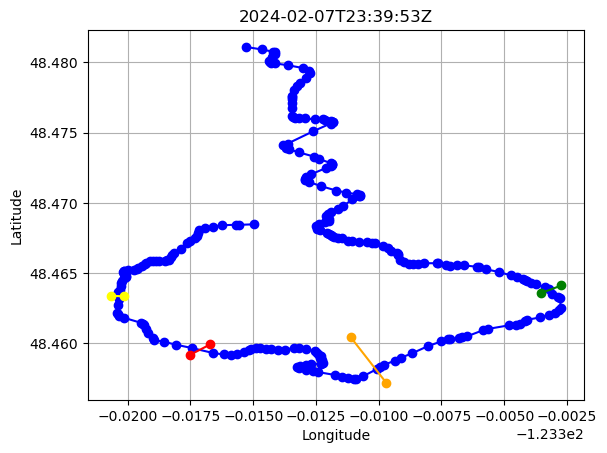

run title: Afternoon Rundistance: 15.0068km	LAPS OF CHIP: 2


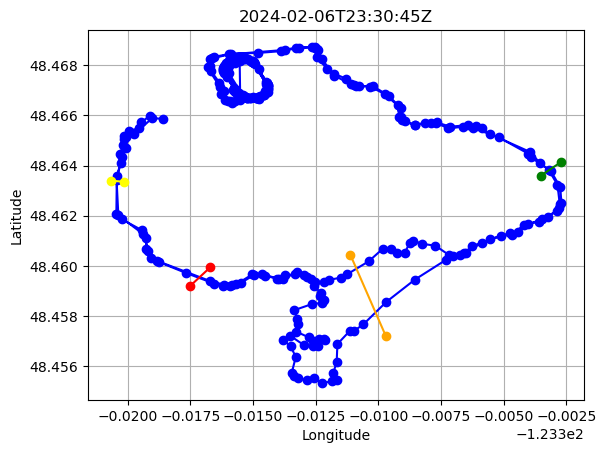

run title: Afternoon Rundistance: 10.0404km	LAPS OF CHIP: 1


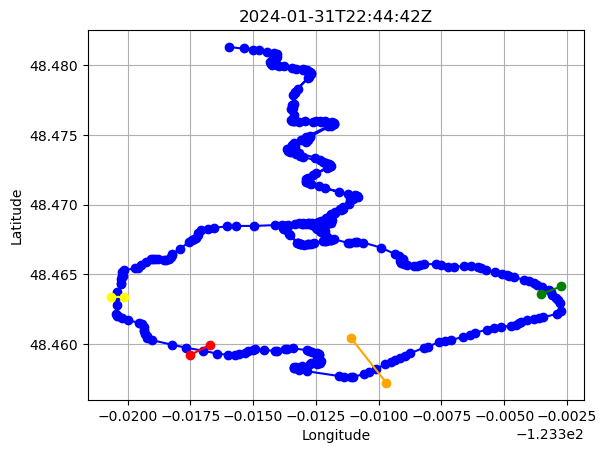

run title: Afternoon Rundistance: 12.7386km	LAPS OF CHIP: 2


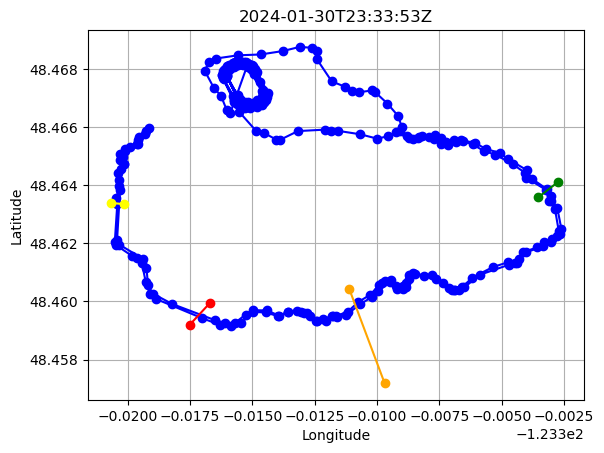

run title: 4:10 shape?distance: 16.6029km	LAPS OF CHIP: 2


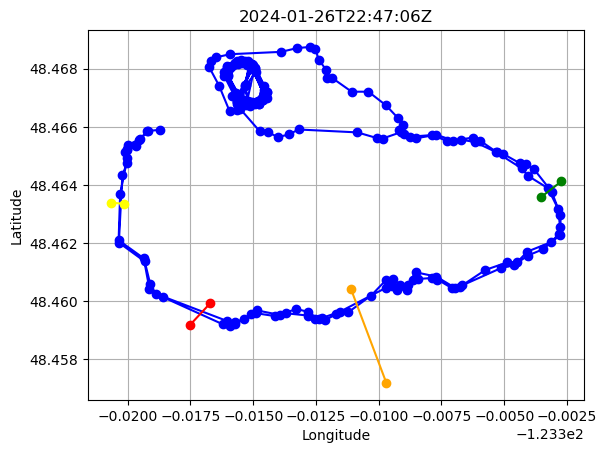

run title: Afternoon Rundistance: 10.459100000000001km	LAPS OF CHIP: 1


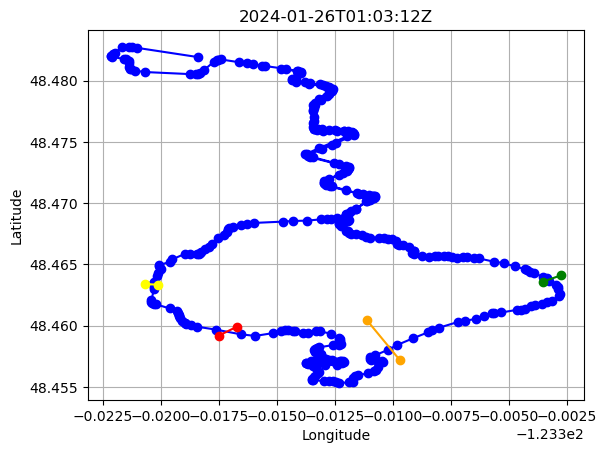

run title: Afternoon Rundistance: 13.1667km	LAPS OF CHIP: 1


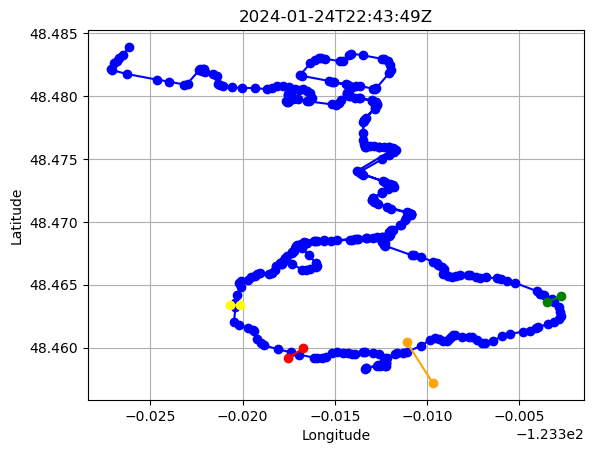

run title: Afternoon Rundistance: 18.8659km	LAPS OF CHIP: 1


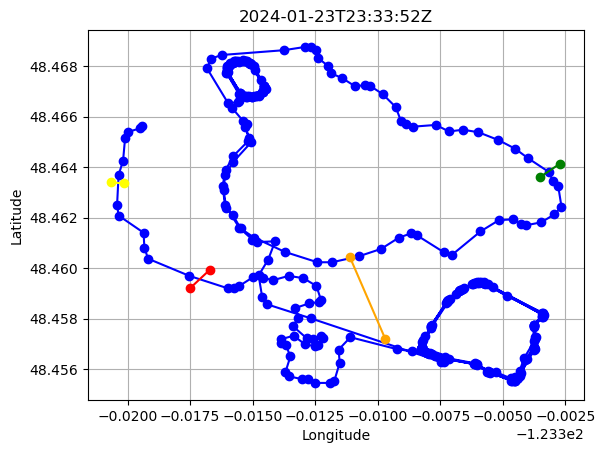

run title: BUTTA DOME FRIDAYdistance: 12.742km	LAPS OF CHIP: 1


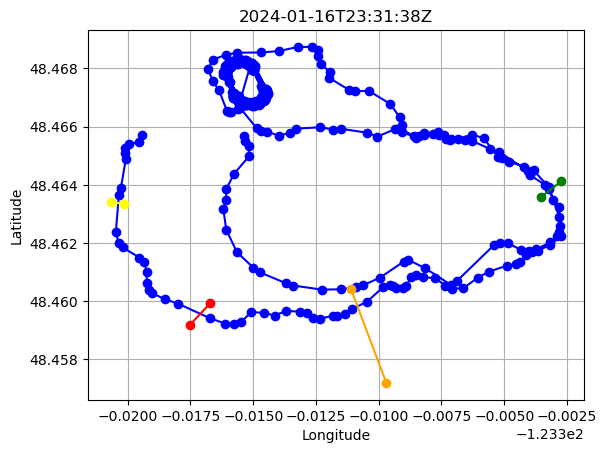

run title: Afternoon Rundistance: 13.5936km	LAPS OF CHIP: 1


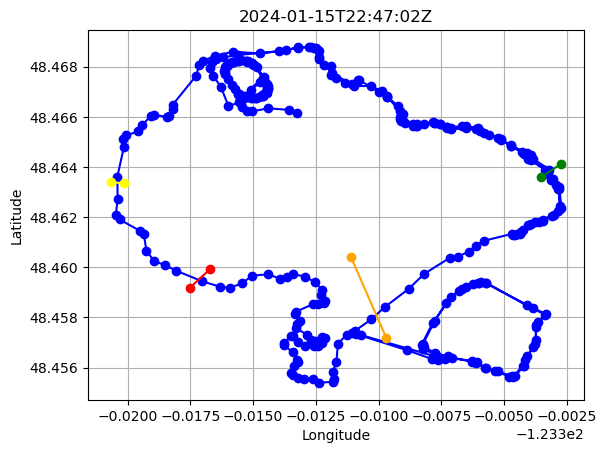

run title: Afternoon Rundistance: 11.239km	LAPS OF CHIP: 1


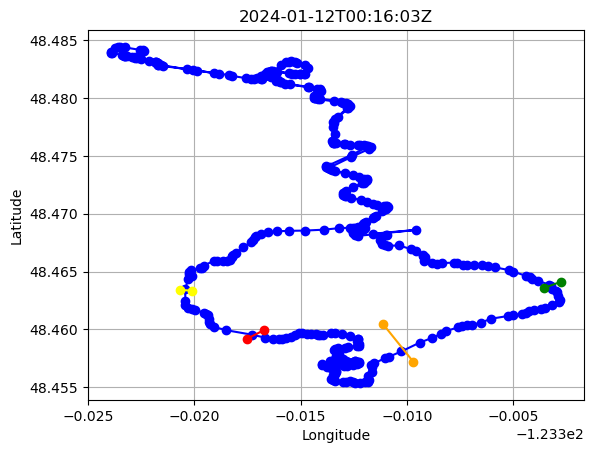

run title: Afternoon Rundistance: 16.6457km	LAPS OF CHIP: 1


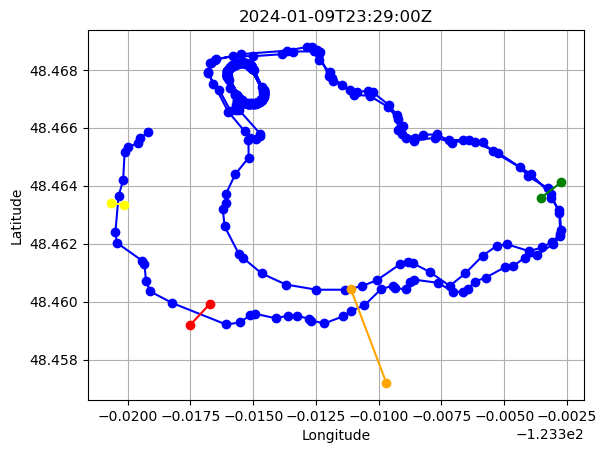

run title: Afternoon Rundistance: 13.020700000000001km	LAPS OF CHIP: 1


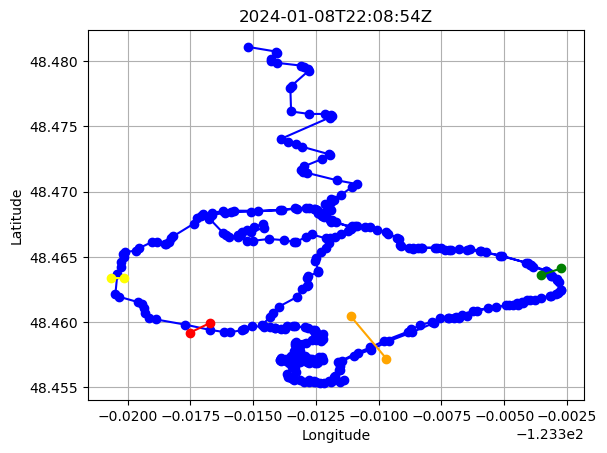

run title: What am I doingdistance: 17.3458km	LAPS OF CHIP: 1


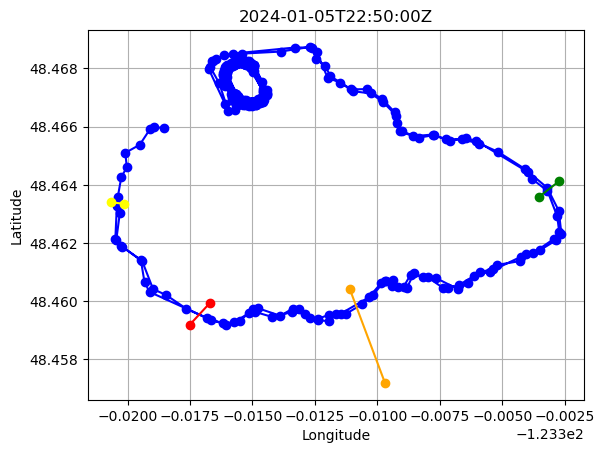

20


In [39]:
#alumni chip trail counter by Marcus Ganz
import os
import requests
from datetime import datetime
from shapely.geometry import LineString
from shapely.geometry import Point


# Set your environment variables
os.environ['STRAVA_EXPIRATION_TIME'] = ''
os.environ['STRAVA_CACHED_REFRESH_TOKEN'] = ''
os.environ['STRAVA_CACHED_TOKEN'] = ''
os.environ['STRAVA_CLIENT_ID'] = ''
os.environ['STRAVA_CLIENT_SECRET'] = ''

def is_strava_token_expired(current_expiration_time):
    current_epoch_time = int(datetime.now().timestamp())
    if current_expiration_time == 'undefined':
        return f"There is an error with the currentExpirationTime, its value is: {current_expiration_time}."
    return current_epoch_time > int(current_expiration_time)

def generate_new_token():
    print('Generating new token...')
    request_url = f"https://www.strava.com/oauth/token?client_id={os.environ['STRAVA_CLIENT_ID']}&client_secret={os.environ['STRAVA_CLIENT_SECRET']}&grant_type=refresh_token&refresh_token={os.environ['STRAVA_CACHED_REFRESH_TOKEN']}"
    
    try:
        response = requests.post(request_url)
        response_data = response.json()
        
        if response_data.get('message') == 'Bad Request':
            print(response_data)
            return None

        return {
            'refreshToken': response_data['refresh_token'],
            'expirationTime': response_data['expires_at'],
            'accessToken': response_data['access_token']
        }
    except Exception as e:
        print(e)

def persist_new_token_data(new_token_data):
    # Update the relevant key with the new value
    os.environ['STRAVA_EXPIRATION_TIME'] = str(new_token_data['expirationTime'])
    os.environ['STRAVA_CACHED_REFRESH_TOKEN'] = new_token_data['refreshToken']
    os.environ['STRAVA_CACHED_TOKEN'] = new_token_data['accessToken']

def get_strava_activity_data():
    print('Requesting activity data from Strava...')
    headers = {"Authorization": f"Bearer {os.environ['STRAVA_CACHED_TOKEN']}"}
    # Set the start date to January 1st, 2024
    start_date = datetime(2024, 1, 1).timestamp()
    end_date = datetime(2024, 2, 15).timestamp()
    print(start_date)
    
    per_page = 200
    page = 1
    all_activities = []
    #per_page=200&page=1
    # Set the start date to January 1st, 2023
    # Handle pagination
    page = 1
    per_page = 200
    all_activities = []

    while True:
        response = requests.get(f"https://www.strava.com/api/v3/athlete/activities?&after={start_date}&before={end_date}&per_page={per_page}&page={page}", headers=headers)

        if response.status_code == 200:
            activities = response.json()
            all_activities.extend(activities)

            if len(activities) < per_page:
                break  # No more activities to fetch
            else:
                page += 1
        elif response.status_code == 429:
            print(f"Rate limit exceeded. Waiting for {response.headers['Retry-After']} seconds...")
            time.sleep(int(response.headers['Retry-After']))
        else:
            print(f"Error: {response.status_code}")
            break

    return all_activities        
        
        
def execute_strava_logic():
    is_token_expired = is_strava_token_expired(os.environ['STRAVA_EXPIRATION_TIME'])

    if isinstance(is_token_expired, str):
        print('Please resolve the error with the current expiration time stored in the .env file.')
        return
    elif is_token_expired:
        print('The expiration time has passed. Generating a new token...')
        # If yes - generate a new token
        new_token_data = generate_new_token()
        if not new_token_data or not new_token_data['expirationTime']:
            print('There was an error getting refresh token data.')
            return
        # Save the new token info to .env
        persist_new_token_data(new_token_data)

    # Make a request to Strava activities endpoint
    strava_activity_data = get_strava_activity_data()
    return strava_activity_data

# Execute Strava logic
strava_data = execute_strava_logic()

# Print or use strava_data as needed
#print(strava_data)

#this loop gets all the polyline data/info from your strava file from 2024 january first to now

#classic loop
#plot 1 48.46869872460117, -123.313423986706
#plot 2 48.45971158245955, -123.3175990897494
#plot 3 48.46044440056452, -123.30675223667048
#plot 4 48.464226658528766, -123.30358453990527

#reverse loop
#plot 1 48.464226658528766, -123.30358453990527
#plot 2 48.46044440056452, -123.30675223667048
#plot 3 48.45971158245955, -123.3175990897494
#plot 4 48.46869872460117, -123.313423986706
x1 = 48.4591907
y1 = -123.3175130
x2 = 48.4599334
y2 = -123.3167117
gate_1 = [(x2,y2), (x1,y1)]

gate2x1 = 48.4633507
gate2y1 = -123.3201309
gate2x2= 48.4633982
gate2y2 = -123.3206804
gate_2 = [(gate2x2, gate2y2), (gate2x1, gate2y1)]


#gate3
gate3x1 = 48.4688168
gate3y1 = -123.3144839
gate3x2 = 48.4683887
gate3y2 = -123.3144222
gate_3 = [(gate3x2, gate3y2), (gate3x1, gate3y1)]

#gate 4
gate4x1 = 48.4641290
gate4y1 = -123.3027206
gate4x2 = 48.4635922
gate4y2 = -123.3035234
gate_4 = [(gate4x2, gate4y2), (gate4x1, gate4y1)]

#gate 5
gate5x1 = 48.4604298
gate5y1 = -123.3111093
gate5x2 = 48.4571932
gate5y2 = -123.3096960
gate_5 = [(gate5x2, gate5y2), (gate5x1, gate5y1)]

#creating Target gates
target_gate_1 = LineString(gate_1)
target_gate_2 = LineString(gate_2)
# target_gate_3 = LineString(gate_3)
target_gate_4 = LineString(gate_4)
target_gate_5 = LineString(gate_5)


#Master Counter
chipLoopCounter = 0


import polyline
import matplotlib.pyplot as plt

for activity in strava_data:
    polylineActivity = activity['map']['summary_polyline']
    #print(f"Activity ID: {activity['id']}, Polyline: {polylineActivity}")
    decoded_polyline = polyline.decode(polylineActivity)
    #print(decoded_polyline)
    #convert polyline to a lineString of coordinates to traverse easily
    check_activity = LineString(decoded_polyline)
    
    does_intersect = check_activity.intersects(target_gate_1)
    
    #intersection CountGate declarations
    intersectionCountGate1 = 0
    intersectionCountGate2 = 0
#     intersectionCountGate3 = 0
    intersectionCountGate4 = 0
    intersectionCountGate5 = 0
    

    
    for i in range(len(decoded_polyline) - 1):
        segment = LineString([decoded_polyline[i], decoded_polyline[i + 1]])
        if segment.intersects(target_gate_1):
            intersectionCountGate1 += 1
        if segment.intersects(target_gate_2):
            intersectionCountGate2 += 1
#         if segment.intersects(target_gate_3):
#             intersectionCountGate3 += 1
        if segment.intersects(target_gate_4):
            intersectionCountGate4 += 1
        if segment.intersects(target_gate_5):
            intersectionCountGate5 += 1
    #print(intersectionCountGate1)
    #print(intersectionCountGate2)
    #print(intersectionCountGate3)
    #print(intersectionCountGate4)
    #print(intersectionCountGate5)
    
    #calculate the minimum ammount of chip laps for that activity
    listCount = [intersectionCountGate1, intersectionCountGate2, intersectionCountGate4, intersectionCountGate5]
    countActivity = min(listCount)
    if(countActivity > 0):
        chipLoopCounter = chipLoopCounter + countActivity
        distance = activity['distance']/1000
        x = 'run title: ' + activity['name'] + 'distance: ' + str(distance) + 'km\t' + 'LAPS OF CHIP: ' + str(countActivity)
        print(x)

        #Extract latitudes and longitudes for plotting
#         if len(decoded_polyline) != 0:
#              latitudes, longitudes = zip(*decoded_polyline)
# #             # Plot the decoded polyline
#              plt.plot([lon for _, lon in decoded_polyline], [lat for lat, _ in decoded_polyline], marker='o', linestyle='-', color='b')
#              plt.plot([y1,y2], [x1,x2], marker='o', linestyle='-', color='r', label='Gate 1')
#              plt.plot([gate2y1,gate2y2], [gate2x1,gate2x2], marker='o', linestyle='-', color='yellow', label='Gate 2')
# #             plt.plot([gate3y1,gate3y2], [gate3x1,gate3x2], marker='o', linestyle='-', color='pink', label='Gate 3')
#              plt.plot([gate4y1,gate4y2], [gate4x1,gate4x2], marker='o', linestyle='-', color='green', label='Gate 4')
#              plt.plot([gate5y1,gate5y2], [gate5x1,gate5x2], marker='o', linestyle='-', color='orange', label='Gate 5')
#              plt.title(activity['start_date'])
#              plt.xlabel('Longitude')
#              plt.ylabel('Latitude')
#              plt.grid(True)
#              plt.show()
#              #print(does_intersect)

print(chipLoopCounter)
